# Multiple Linear Regression Predictive Modeling for House Prices in King County

# 1. Business Understanding
##  a) Introduction


The real estate market in King County is dynamic, and accurately predicting house prices is essential for informed decision-making by buyers and sellers. This project aims to develop a predictive model that can estimate house prices based on various features in the King County House Sales dataset. By leveraging data visualization techniques and conducting comprehensive analysis, we can gain valuable insights into the factors that significantly impact house prices. The objective is to build a robust regression model that effectively captures these relationships and provides accurate predictions. Additionally, by utilizing visualization and analysis, we can enhance our understanding of the dataset, facilitate model interpretation, and provide actionable recommendations to homeowners based on the model's insights.


## b) Problem Statement

The main problem addressed in this project is the lack of an efficient method to predict house prices accurately in King County. Existing methods might not consider all relevant features and may lead to inaccurate estimations. This project aims to develop a predictive model that takes into account multiple variables and accurately predicts house prices in King County.

## c) Main Objective:
The main objective of this project is to develop an accurate predictive model that can estimate house prices in King County based on various features. By analyzing the King County House Sales dataset and implementing appropriate multiple regression model, the goal is to create a reliable tool for buyers, sellers, and real estate professionals to make informed decisions about house prices in the region.


## d) Specific Objectives:

1. Develop and evaluate multiple linear regression model to identify the most influential factors that impact house prices in the King County housing market. This will involve exploring various regression algorithms and feature selection techniques to determine the key predictors of house prices.

2. Assess the performance of the developed  model in predicting house prices.Evaluate the model based on relevant metrics such as mean absolute error (MAE), root mean square error (RMSE), and R-squared to measure their accuracy and effectiveness in predicting future house prices.
 

## e) Experimental Design

+ Data Understanding

+ Data Exploration and Preparation

+ Feature Selection

+ Modelling

+ Fitting the Model

+ Interpretation of Coefficients and Evaluation of Modet Fit

+ Model Validation

+ Interpret and Communicate Results and Recommendations


##  f) Data Understanding

The data used in this project,that has 20 columns and 21597 rows,was downloaded from [here](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)
, consists of information related to house sales. Here is a description for each column:


**id**: A unique identifier for each house.

**date**: The date when the house was sold.

**price**: The target variable representing the price of the house.

**bedrooms**: The number of bedrooms in the house.

**bathrooms**: The number of bathrooms in the house.

**sqft_living**: The square footage of the home.

**sqft_lot**: The square footage of the lot.

**floors**: The total number of floors in the house.

**waterfront**: Indicates whether the house has a view to a waterfront.

**view**: Indicates whether the house has been viewed.

**condition**: Represents the overall condition of the house.

**grade**: Represents the overall grade given to the housing unit based on the King County grading system.

**sqft_above**: The square footage of the house apart from the basement.

**sqft_basement**: The square footage of the basement.

**yr_built**: The year the house was built.

**yr_renovated**: The year when the house was renovated.

**zipcode**: The zip code of the house's location.

**lat**: The latitude coordinate of the house's location.

**long**: The longitude coordinate of the house's location.

**sqft_living15**: The square footage of interior housing living space for the nearest 15 neighbors.

**sqft_lot15**: The square footage of the land lots of the nearest 15 neighbors.

# 2.  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


# 3. Reading Data

In [2]:
# Reading the dataset from the CSV file
df = pd.read_csv("data\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# 4 Data Preparation

Preparing the dataset by ensuring that all variables are in the correct format and handle missing values appropriately. I'll then convert categorical variables into dummy variables or use appropriate encoding techniques, such as one-hot encoding.I'll also check for other potential issues such as outliers

In [4]:
# Calculating the percentage of missing data for 'waterfront'  and 'yr_renovated'  columns to help guide decision

waterfront_missing_percentage = df['waterfront'].isnull().sum() / len(df['waterfront']) * 100
print("Percentage of missing data for 'waterfront' column: {:.2f}%".format(waterfront_missing_percentage))


yr_renovated_missing_percentage = df['yr_renovated'].isnull().sum() / len(df['yr_renovated']) * 100
print("Percentage of missing data for 'yr_renovated' column: {:.2f}%".format(yr_renovated_missing_percentage))


Percentage of missing data for 'waterfront' column: 11.00%
Percentage of missing data for 'yr_renovated' column: 17.79%


In [5]:
df['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [6]:
df['sqft_basement'].value_counts()

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In [7]:
df['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

In [8]:
# Filling missing values in 'waterfront' column with "N0" value
df['waterfront'].fillna("NO", inplace=True)

# Drop rows with "?" in 'sqft_basement'
df = df[df['sqft_basement'] != "?"]

## Convert 'sqft_basement' column to numeric data type
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

# Dropping  the 'y_renovated' feature since most values are '0' and irrelevant for the model.Also dropping other features that I'll not consider for the model i.e 'id' 'date','zipcode'
df.drop(['id','date','zipcode','yr_renovated'], axis=1, inplace=True)

# Removing duplicates
df.drop_duplicates(inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,47.6168,-122.045,1800,7503


In [9]:
#Checking uniques elements in "view" feature to guide decision

unique_views = df['view'].unique()
print(unique_views)


['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [10]:
# Mapping the categories to numeric values and replacing "nan" with the most frequent rating

#Mappping
view_mapping = {'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}

# Assigning numeric values based on mapping
df['view'] = df['view'].map(view_mapping)

# Replacing 'nan' values with frequent rating rating
df['view'] = df['view'].fillna(0)

# Display information about the reprocessed DataFrame
df.head()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NO,0.0,Average,7 Average,1180,0.0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,0.0,Average,7 Average,2170,400.0,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,0.0,Average,6 Low Average,770,0.0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,0.0,Very Good,7 Average,1050,910.0,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,0.0,Average,8 Good,1680,0.0,1987,47.6168,-122.045,1800,7503


In [11]:
#Rechecking to 'view' feature for unique values
unique_views = df['view'].unique()
print(unique_views)

[0. 3. 4. 2. 1.]


In [12]:
# Performing one-hot encoding for the 'condition' column
condition_encoded = pd.get_dummies(df['condition'], prefix='condition')

# Concatenating the encoded columns to the original DataFrame
df_encoded = pd.concat([df, condition_encoded], axis=1)

# Dropping the original 'condition' column
df_encoded.drop('condition', axis=1, inplace=True)

# Displaying the updated DataFrame with one-hot encoded 'condition' column
df_encoded.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,...,yr_built,lat,long,sqft_living15,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,221900.0,3,1.00,1180,5650,1.0,NO,0.0,7 Average,1180,...,1955,47.5112,-122.257,1340,5650,True,False,False,False,False
1,538000.0,3,2.25,2570,7242,2.0,NO,0.0,7 Average,2170,...,1951,47.7210,-122.319,1690,7639,True,False,False,False,False
2,180000.0,2,1.00,770,10000,1.0,NO,0.0,6 Low Average,770,...,1933,47.7379,-122.233,2720,8062,True,False,False,False,False
3,604000.0,4,3.00,1960,5000,1.0,NO,0.0,7 Average,1050,...,1965,47.5208,-122.393,1360,5000,False,False,False,False,True
4,510000.0,3,2.00,1680,8080,1.0,NO,0.0,8 Good,1680,...,1987,47.6168,-122.045,1800,7503,True,False,False,False,False


In [13]:
#Retrieving the unique values of the 'grade' feature from the DataFrame for Mapping

unique_grades = df_encoded['grade'].unique()
unique_grades

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [14]:
#Mapping

grade_mapping = {
    '3 Poor': 3,
    '4 Low': 4,
    '5 Fair': 5,
    '6 Low Average': 6,
    '7 Average': 7,
    '8 Good': 8,
    '9 Better': 9,
    '10 Very Good': 10,
    '11 Excellent': 11,
    '12 Luxury': 12,
    '13 Mansion': 13
}
df_encoded['grade'] = df_encoded['grade'].replace(grade_mapping)
df_encoded.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,...,yr_built,lat,long,sqft_living15,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,221900.0,3,1.00,1180,5650,1.0,NO,0.0,7,1180,...,1955,47.5112,-122.257,1340,5650,True,False,False,False,False
1,538000.0,3,2.25,2570,7242,2.0,NO,0.0,7,2170,...,1951,47.7210,-122.319,1690,7639,True,False,False,False,False
2,180000.0,2,1.00,770,10000,1.0,NO,0.0,6,770,...,1933,47.7379,-122.233,2720,8062,True,False,False,False,False
3,604000.0,4,3.00,1960,5000,1.0,NO,0.0,7,1050,...,1965,47.5208,-122.393,1360,5000,False,False,False,False,True
4,510000.0,3,2.00,1680,8080,1.0,NO,0.0,8,1680,...,1987,47.6168,-122.045,1800,7503,True,False,False,False,False


In [15]:
#Encoding the waterfront feature

# Converting the columns to categorical type
df_encoded['waterfront'] = pd.Categorical(df_encoded['waterfront'])

# Assigning numerical values to categories
df_encoded['waterfront'] = df_encoded['waterfront'].cat.codes
df_encoded


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,...,yr_built,lat,long,sqft_living15,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,221900.0,3,1.00,1180,5650,1.0,0,0.0,7,1180,...,1955,47.5112,-122.257,1340,5650,True,False,False,False,False
1,538000.0,3,2.25,2570,7242,2.0,0,0.0,7,2170,...,1951,47.7210,-122.319,1690,7639,True,False,False,False,False
2,180000.0,2,1.00,770,10000,1.0,0,0.0,6,770,...,1933,47.7379,-122.233,2720,8062,True,False,False,False,False
3,604000.0,4,3.00,1960,5000,1.0,0,0.0,7,1050,...,1965,47.5208,-122.393,1360,5000,False,False,False,False,True
4,510000.0,3,2.00,1680,8080,1.0,0,0.0,8,1680,...,1987,47.6168,-122.045,1800,7503,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0.0,8,1530,...,2009,47.6993,-122.346,1530,1509,True,False,False,False,False
21593,400000.0,4,2.50,2310,5813,2.0,0,0.0,8,2310,...,2014,47.5107,-122.362,1830,7200,True,False,False,False,False
21594,402101.0,2,0.75,1020,1350,2.0,0,0.0,7,1020,...,2009,47.5944,-122.299,1020,2007,True,False,False,False,False
21595,400000.0,3,2.50,1600,2388,2.0,0,0.0,8,1600,...,2004,47.5345,-122.069,1410,1287,True,False,False,False,False


In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21138 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21138 non-null  float64
 1   bedrooms             21138 non-null  int64  
 2   bathrooms            21138 non-null  float64
 3   sqft_living          21138 non-null  int64  
 4   sqft_lot             21138 non-null  int64  
 5   floors               21138 non-null  float64
 6   waterfront           21138 non-null  int8   
 7   view                 21138 non-null  float64
 8   grade                21138 non-null  int64  
 9   sqft_above           21138 non-null  int64  
 10  sqft_basement        21138 non-null  float64
 11  yr_built             21138 non-null  int64  
 12  lat                  21138 non-null  float64
 13  long                 21138 non-null  float64
 14  sqft_living15        21138 non-null  int64  
 15  sqft_lot15           21138 non-null  int6

#  5.Exploratory Data Analysis

## a) Examining the Target Variable, 'Price'

I'll examine if the target variable is normally distributed and check for anomliesvby creating a histogram to visualize the distribution of prices in the DataFrame.

Skew is: 4.035404319786193


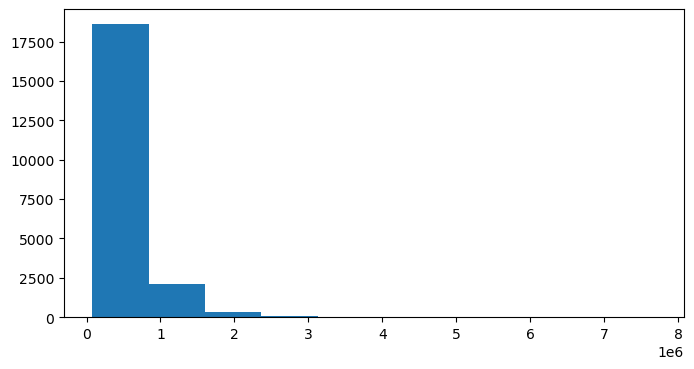

In [17]:
#Target Variabe Price

print ("Skew is:",df_encoded.price.skew())
plt.figure(figsize=(8,4))
plt.hist(df.price)
plt.show()

Skewness after transformation: 4.035404319786193


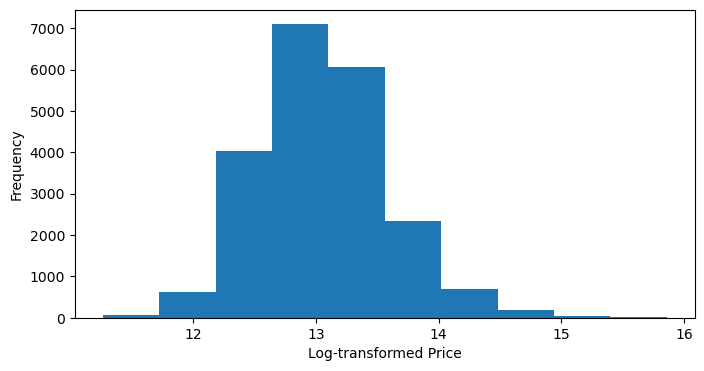

In [18]:
# Log-transform the 'price' variable
df['price_log'] = np.log1p(df_encoded['price'])

# Calculate the skewness of the transformed variable
print("Skewness after transformation:", df_encoded['price'].skew())

# Plot the histogram of the transformed variable
plt.figure(figsize=(8, 4))
plt.hist(df['price_log'])
plt.xlabel('Log-transformed Price')
plt.ylabel('Frequency')
plt.show()


## b) Identifying a Promisng Predictor

### i) Examining the Correlation between Features and Price

Working out the correlation of all the features to understand their relationship with the target variable price and guide decision on the features to examine.

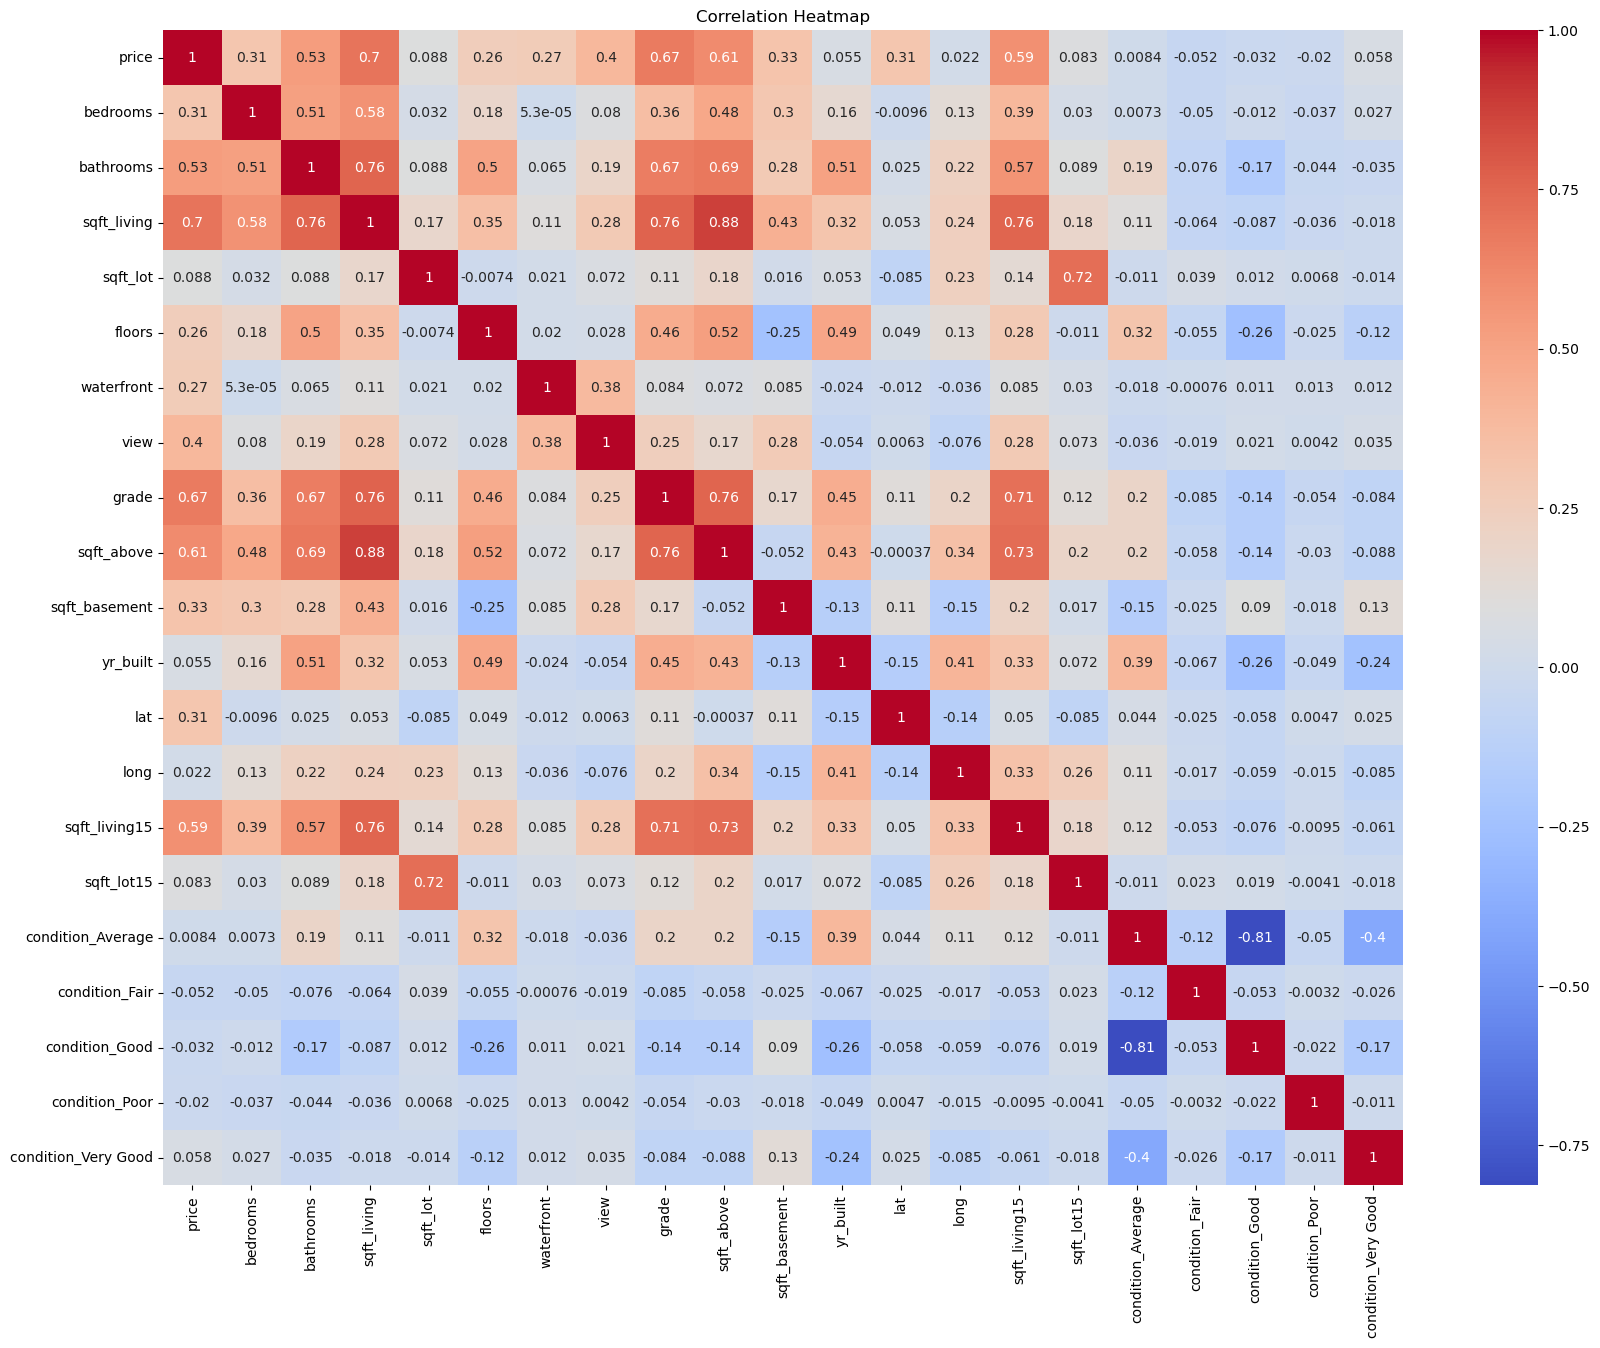

In [19]:
# correlation matrix
corr_matrix = df_encoded.corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()


In [20]:
# Calculate the correlation matrix
correlation = df_encoded[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                          'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
                          'sqft_living15', 'sqft_lot15', 'condition_Average', 'condition_Fair',
                          'condition_Good', 'condition_Poor', 'condition_Very Good']].corrwith(df_encoded['price'])

# Sort correlation values in descending order
correlation = correlation.sort_values(ascending=False)

# Display the correlation table
print(correlation)


sqft_living            0.702328
grade                  0.667847
sqft_above             0.605134
sqft_living15          0.586414
bathrooms              0.525898
view                   0.395003
sqft_basement          0.325031
bedrooms               0.309179
lat                    0.306505
waterfront             0.265971
floors                 0.256456
sqft_lot               0.087928
sqft_lot15             0.083179
condition_Very Good    0.057767
yr_built               0.054511
long                   0.022060
condition_Average      0.008431
condition_Poor        -0.020057
condition_Good        -0.032377
condition_Fair        -0.052201
dtype: float64


The correlations listed represent the relationship between various features and the price of houses in King County. The analysis reveals the following patterns: 

+ There is a strong positive correlation between the living area square footage and house price, indicating that as the living area increases, the price tends to increase as well. 

+ The grade of a house also shows a strong positive correlation with the price, meaning that higher-grade houses are associated with higher prices. 

+ Similarly, there is a moderate positive correlation between the square footage above ground level, the square footage of the land lots of the nearest 15 neighbors, the number of bathrooms, the quality of the view, and the house price. 

+ Factors such as the square footage of the basement, the number of bedrooms, the latitude of the location, and the presence of a waterfront view have a positive correlation with the price, but their impact is weaker. The number of floors, the size of the lot, the year it was built, and the longitude of the location all have relatively weak positive correlations with the house price.

+ The relatively weak correlation between the condition parameters and house price suggests that factors such as subjectivity, limited impact on price, variability within categories, data limitations, and the influence of other factors contribute to the weaker relationship.


Thus fo the modelling I'll select features that have at least 0.1 correlation with the price
The below features meet this threshold

+ sqft_living           
+ grade                
+ sqft_above            
+ sqft_living15          
+ bathrooms              
+ view                   
+ sqft_basement          
+ bedrooms               
+ lat                    
+ waterfront            
+ floors    


I'll proceed to drop the other features that i'll not use in the model.

In [21]:
#Dropping the other features
df_encoded.drop(['sqft_lot','condition_Very Good','yr_built','long','long','condition_Average','condition_Poor','condition_Good','condition_Fair'], axis=1, inplace=True)
df_encoded

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,1.0,0,0.0,7,1180,0.0,47.5112,1340,5650
1,538000.0,3,2.25,2570,2.0,0,0.0,7,2170,400.0,47.7210,1690,7639
2,180000.0,2,1.00,770,1.0,0,0.0,6,770,0.0,47.7379,2720,8062
3,604000.0,4,3.00,1960,1.0,0,0.0,7,1050,910.0,47.5208,1360,5000
4,510000.0,3,2.00,1680,1.0,0,0.0,8,1680,0.0,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,0,0.0,8,1530,0.0,47.6993,1530,1509
21593,400000.0,4,2.50,2310,2.0,0,0.0,8,2310,0.0,47.5107,1830,7200
21594,402101.0,2,0.75,1020,2.0,0,0.0,7,1020,0.0,47.5944,1020,2007
21595,400000.0,3,2.50,1600,2.0,0,0.0,8,1600,0.0,47.5345,1410,1287


### ii) Examination of Association of Ordinal Features with the Target Variable, Price



Examining the association of ordinal features with the target variable is essential because it helps determine the relationship and impact of these features on the target variable.

By examining the association between ordinal features 'bedrooms', 'bathrooms', 'floors', 'view', 'grade'  and the target variable,price, we can understand how changes in these features affect the target variable's values

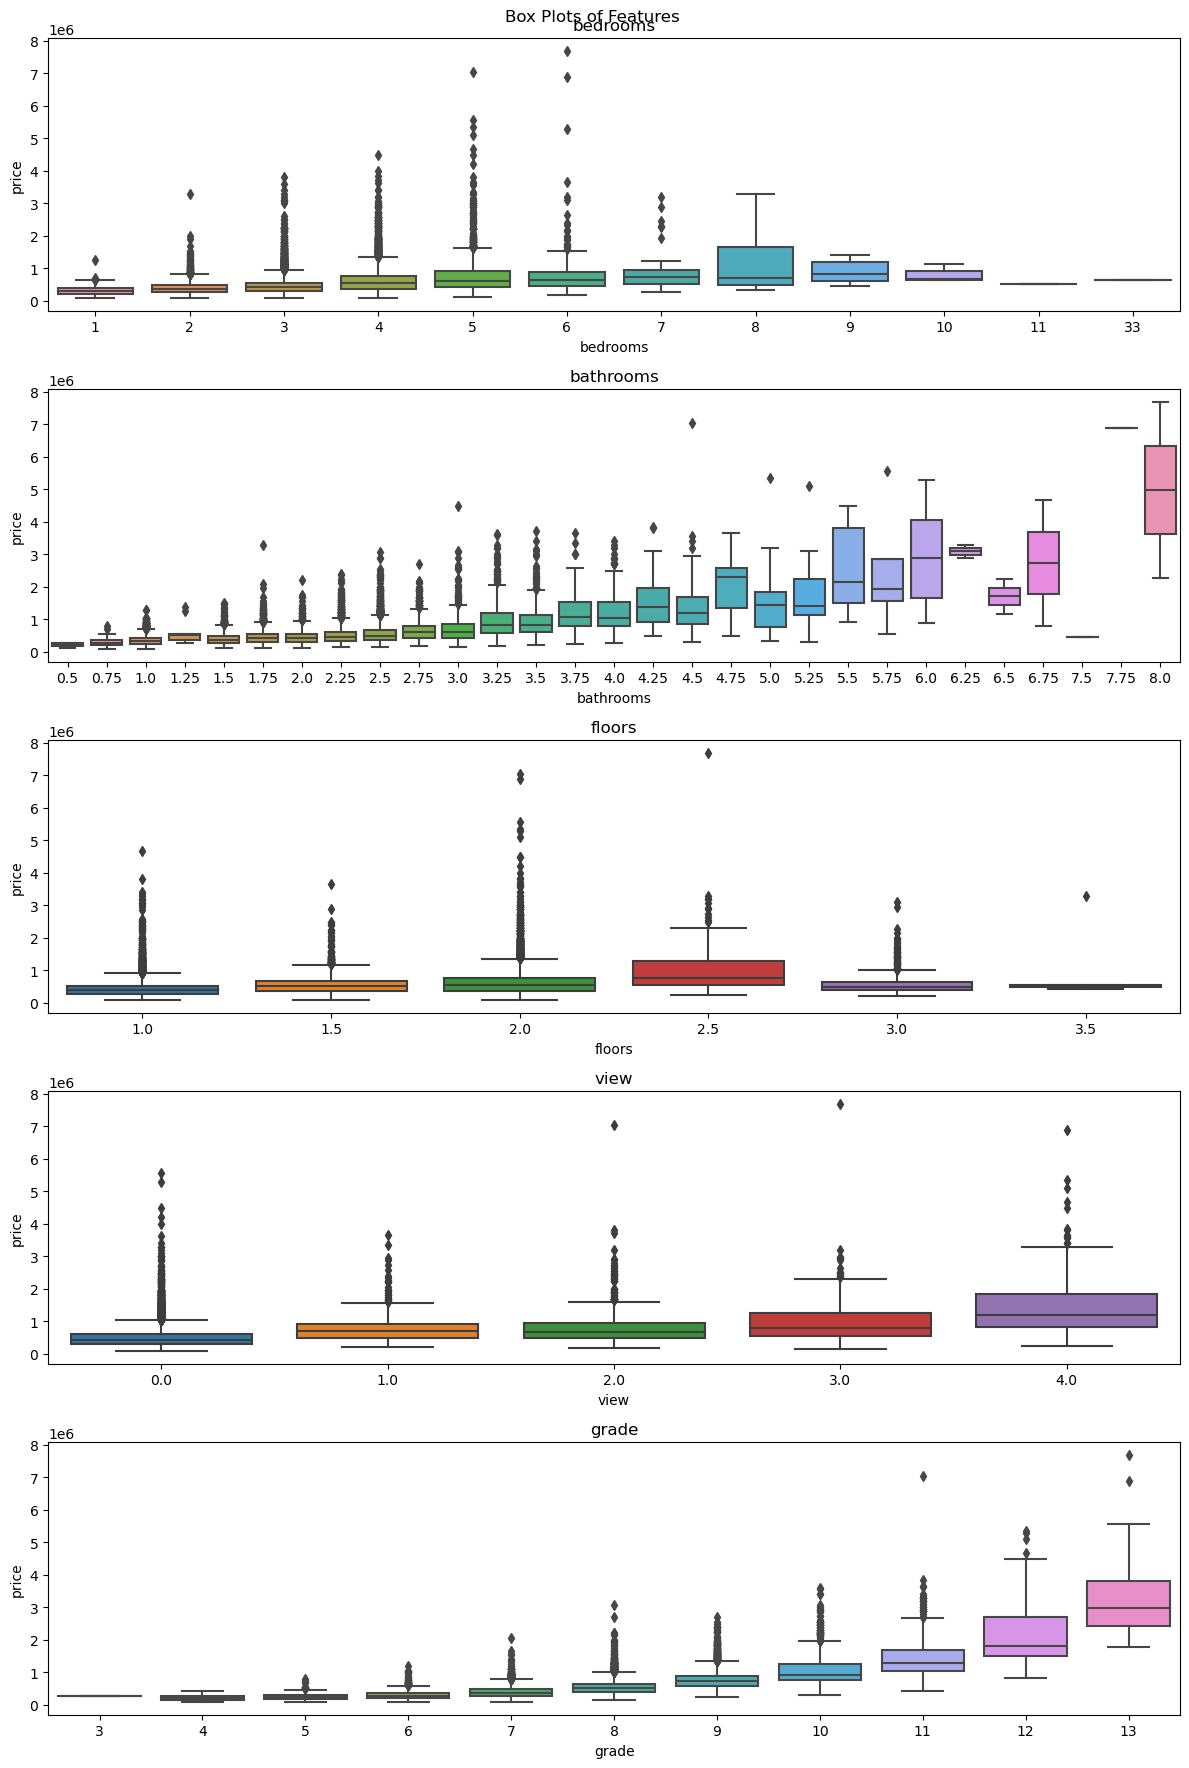

In [22]:
# Selecting the ordinal features to visualize
features = ['bedrooms', 'bathrooms', 'floors', 'view', 'grade']

# Creating box plots for each feature
plt.figure(figsize=(12, 18))  # Increase the figsize for larger plots
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)  # Change the subplot arrangement to vertical
    sns.boxplot(x=feature, y='price', data=df_encoded)
    plt.title(feature)

plt.suptitle('Box Plots of Features ')
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()



There seems to be outliers with the bedroon and bathroom features.To exclude these outliers, I checked for the number of outliers in the bedrooms and bathrooms columns.

In [23]:
# Calculateing the number of outliers in the 'bathrooms' column 
count = 0
mean = np.mean(df_encoded['bathrooms'])
max_distance = np.std(df_encoded['bathrooms']) * 3 

for idx, value in df_encoded['bathrooms'].items():
    if abs(value - mean) >= max_distance:
        count += 1
count

180

In [24]:
#Calculateing the number of outliers in the 'bedrooms' column 

count = 0
mean = np.mean(df['bedrooms'])
max_distance = np.std(df['bedrooms']) * 3 

for idx, value in df['bedrooms'].items():
    if abs(value - mean) >= max_distance:
        count += 1
count

60

In [25]:
#Normalizing 'bedrooms' and 'bathrooms features'

# Calculating the mean and standard deviation of 'bedrooms' and 'bathrooms'
bedrooms_mean = df_encoded['bedrooms'].mean()
bedrooms_std = df_encoded['bedrooms'].std()
bathrooms_mean = df_encoded['bathrooms'].mean()
bathrooms_std = df_encoded['bathrooms'].std()

# Excluding buildings with outliers in 'bedrooms' and 'bathrooms' columns
df_encoded = df_encoded[(df_encoded['bedrooms'] > (bedrooms_mean - 3 * bedrooms_std)) & (df_encoded['bedrooms'] < (bedrooms_mean + 3 * bedrooms_std)) &
        (df_encoded['bathrooms'] > (bathrooms_mean - 3 * bathrooms_std)) & (df_encoded['bathrooms'] < (bathrooms_mean + 3 * bathrooms_std))]


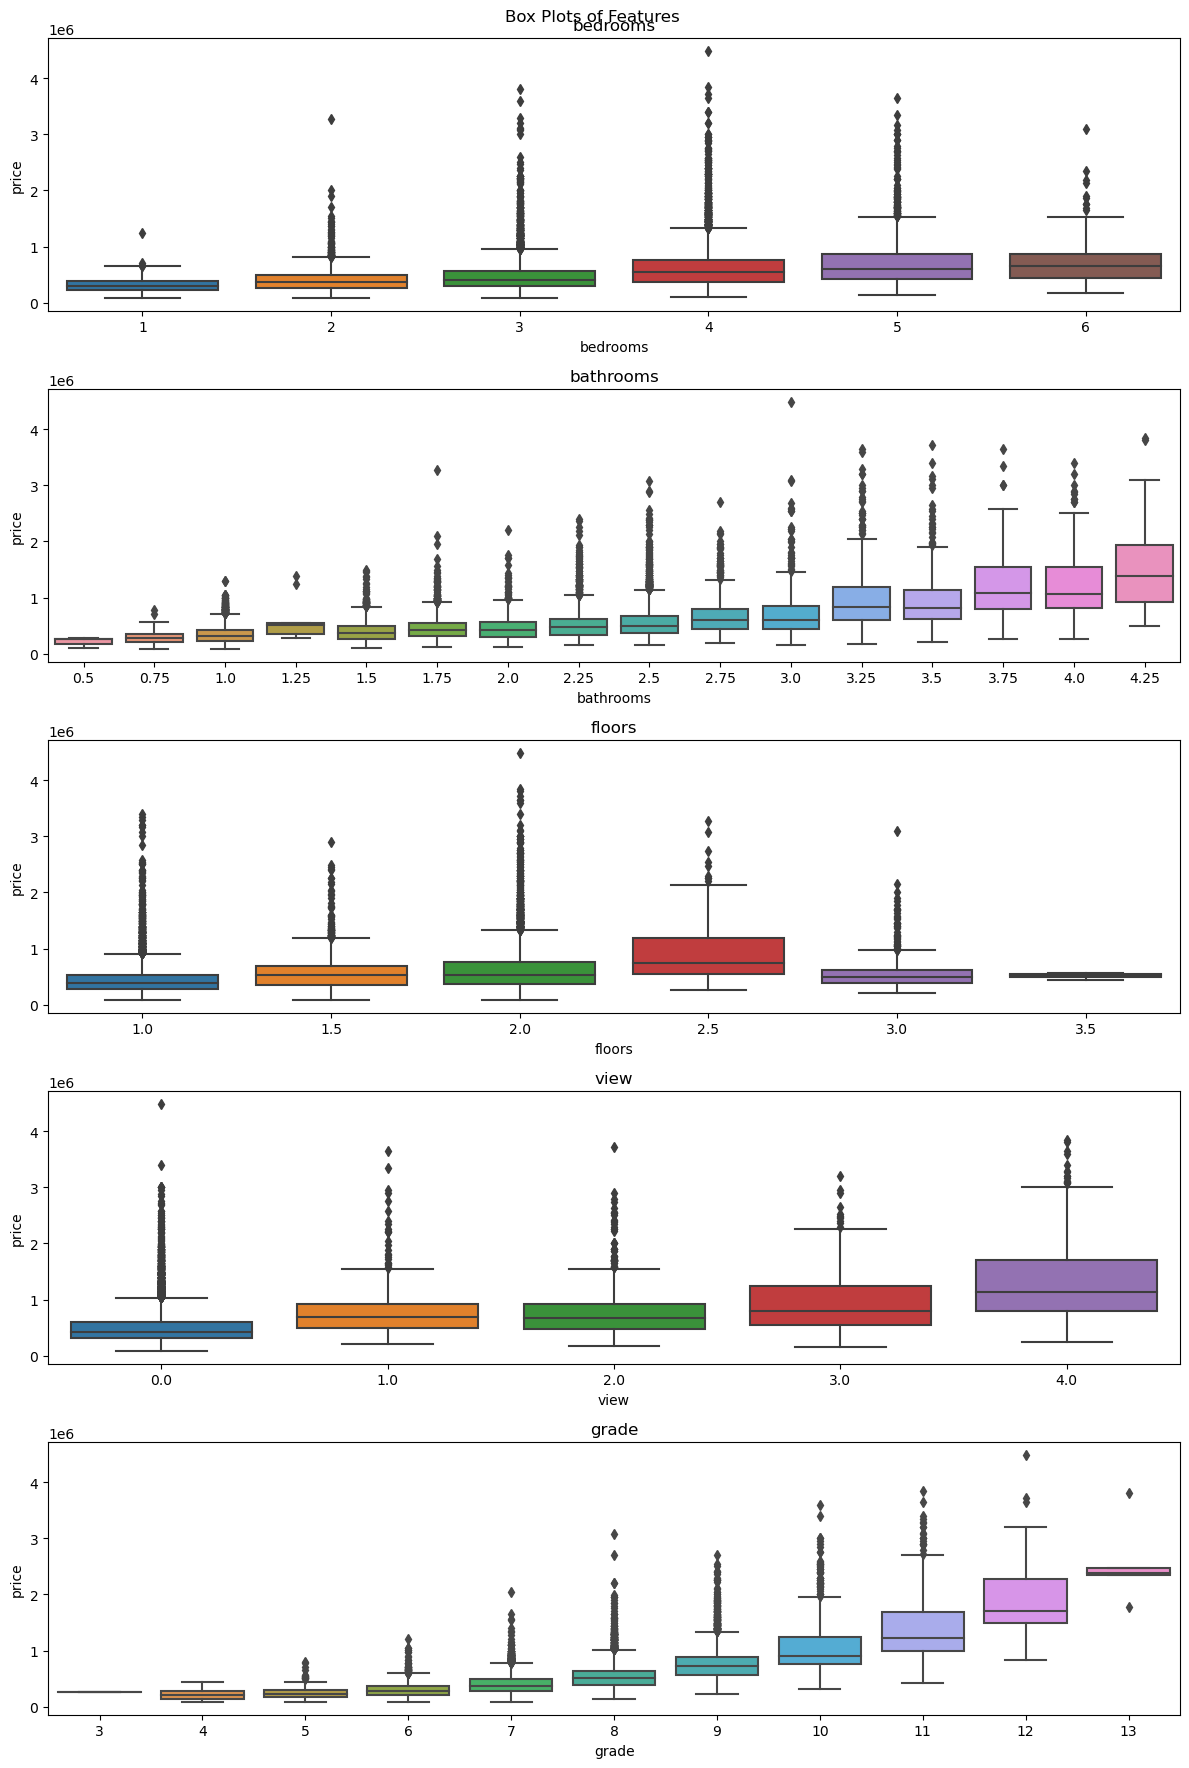

In [26]:
# Visualizing after changes
features = ['bedrooms', 'bathrooms', 'floors', 'view', 'grade']

# Creating box plots for each feature
plt.figure(figsize=(12, 18))  # Increase the figsize for larger plots
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)  # Change the subplot arrangement to vertical
    sns.boxplot(x=feature, y='price', data=df_encoded)
    plt.title(feature)

plt.suptitle('Box Plots of Features ')
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

**Analysis**

This analysis shows that bedrooms, bathrooms, floors, view, and grade have significant associations with house prices. Houses with more bedrooms and bathrooms tend to have higher prices, while multi-floor houses and those with desirable views also command higher prices. Additionally, houses with higher grades, indicating superior quality and construction, are generally priced higher. Considering these features in our model can enhance its predictive power, but it's important to consider other factors and conduct further analysis for a comprehensive understanding of their impact on house prices.



### iii) Examination of Association of Continuous Features with the Price¶

By examining the association, we can determine the strength and direction of the relationship between the continuous features 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'lat' and the price.

This is help in identifying which continuous features have a significant impact on the price. Thus by understanding the association, I can prioritize and focus on the features that have the strongest relationship with price. This information will helps in feature selection and modelling.


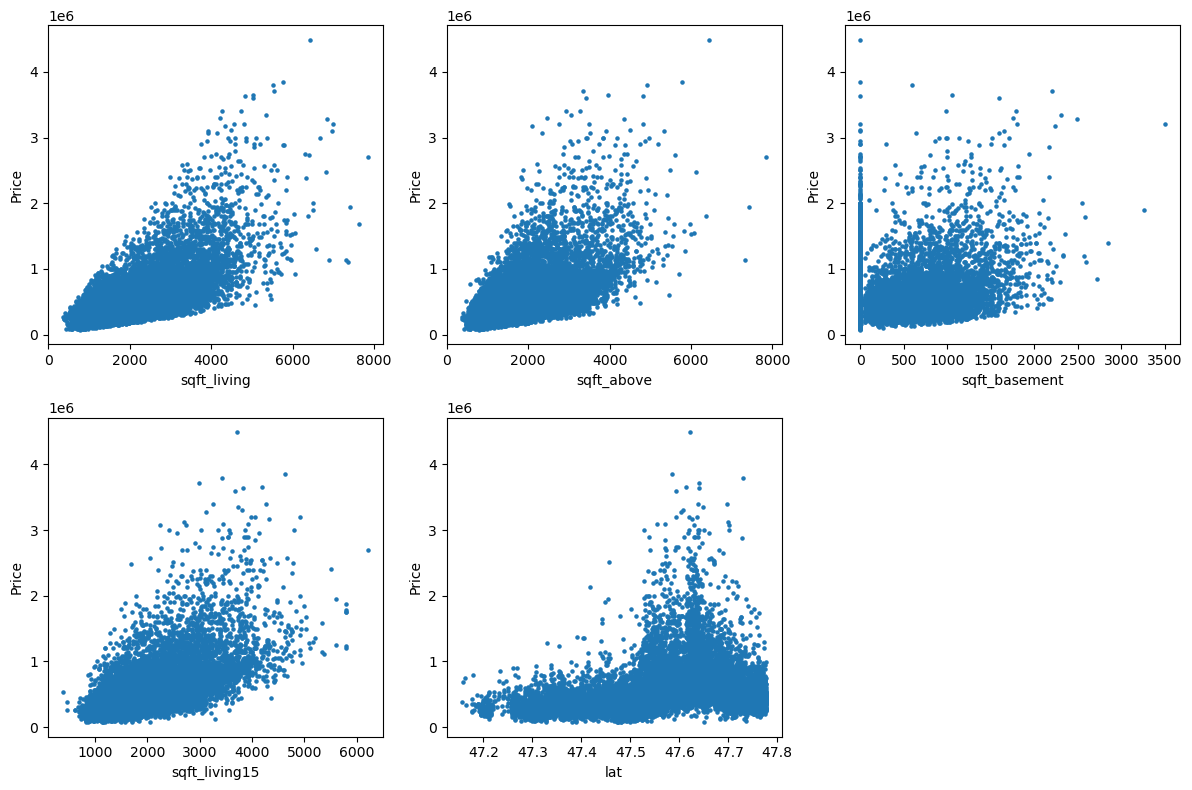

In [27]:
features = ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'lat']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    plt.scatter(df_encoded[feature], df_encoded['price'], s=5)
    plt.xlabel(feature)
    plt.ylabel('Price')
    

plt.tight_layout()
plt.show()


**Analysis**

The scatter plots of the features 'sqft_living', 'sqft_above', 'sqft_basement', and 'sqft_living15' against the price indicate a strong association between these features and house prices.

As the magnitude of these features increases, the prices of the houses tend to increase as well. This suggests that these features play a significant role in determining the price of a house.

Considering the strength of the association between these features and the price, it would be prudent to include them in the feature selection process for our model. These features are likely to provide valuable information for predicting house prices accurately.

The scatter plot of the feature 'lat' against the price shows that there is some variation in house prices across different latitude values. However, the relationship between the latitude and house prices appears to be relatively unclear or uncertain. It is challenging to draw a clear conclusion about the impact of latitude on house pricing based on the scatter plot alone.

However, it is worth noting that houses located at latitudes around 47.6 and 47.7 seem to fetch higher prices compared to other latitudes. This observation suggests that there might be some correlation or pattern between these specific latitude values and higher house prices. Further analysis and consideration of other factors are necessary to determine the exact relationship between latitude and house pricing.

### iv) Examination of Association of Waterfront feature with the Price

Similarly,understaning the impact of waterfront presence on pricing of houses will be vital in determing if the feature is selected and refining my model.

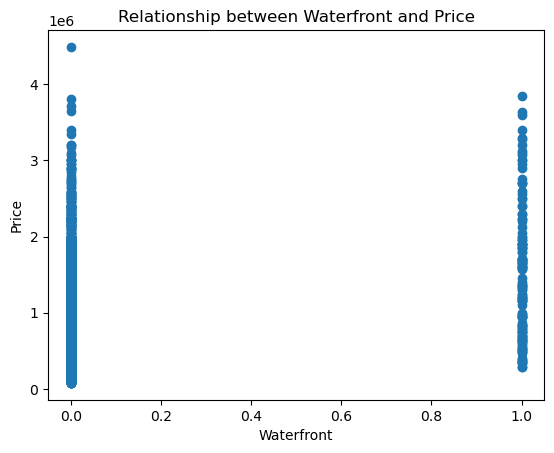

In [28]:
plt.scatter(df_encoded['waterfront'], df_encoded['price'])
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.title('Relationship between Waterfront and Price')
plt.show()


**Analysis**

This graph suggests that there is an association between the feature "waterfront" and house prices. While a majority of the houses sold do not have a view to a waterfront, it is interesting to note that some houses without a waterfront view fetch the highest prices.

This finding implies that factors other than waterfront view, such as location, amenities, or architectural design, may contribute significantly to the high prices of these houses. It is important to consider these additional factors when evaluating house prices and not solely rely on the presence or absence of a waterfront view.

By including this feature in our model,in conjunction with other features, we can capture its potential impact on house prices and improve the predictive power of the model

##  b) Building a Mutiple Regression Model

In [29]:
#Defining the variables for the regression model
X = df_encoded.drop('price', axis=1)
y = df_encoded['price'] 


### Feature Selection



Examining the four assumptions that must be checked as part of the multiple linear regression analysis process:

+ No multicollinearity
+ Linear relationship between explanatory and response variables
+ Homoscedasticity of error terms
+ Normal distribution of model residuals

I'll dig deeper into each of these assumption

####  i) Multicollinearity
Using seaborn, I created a heatmap of correlations between each variable and all the others. The absolute value of the correlations was calculated because only the strength, not the direction, of a linear relationship matters for satisfying this assumption

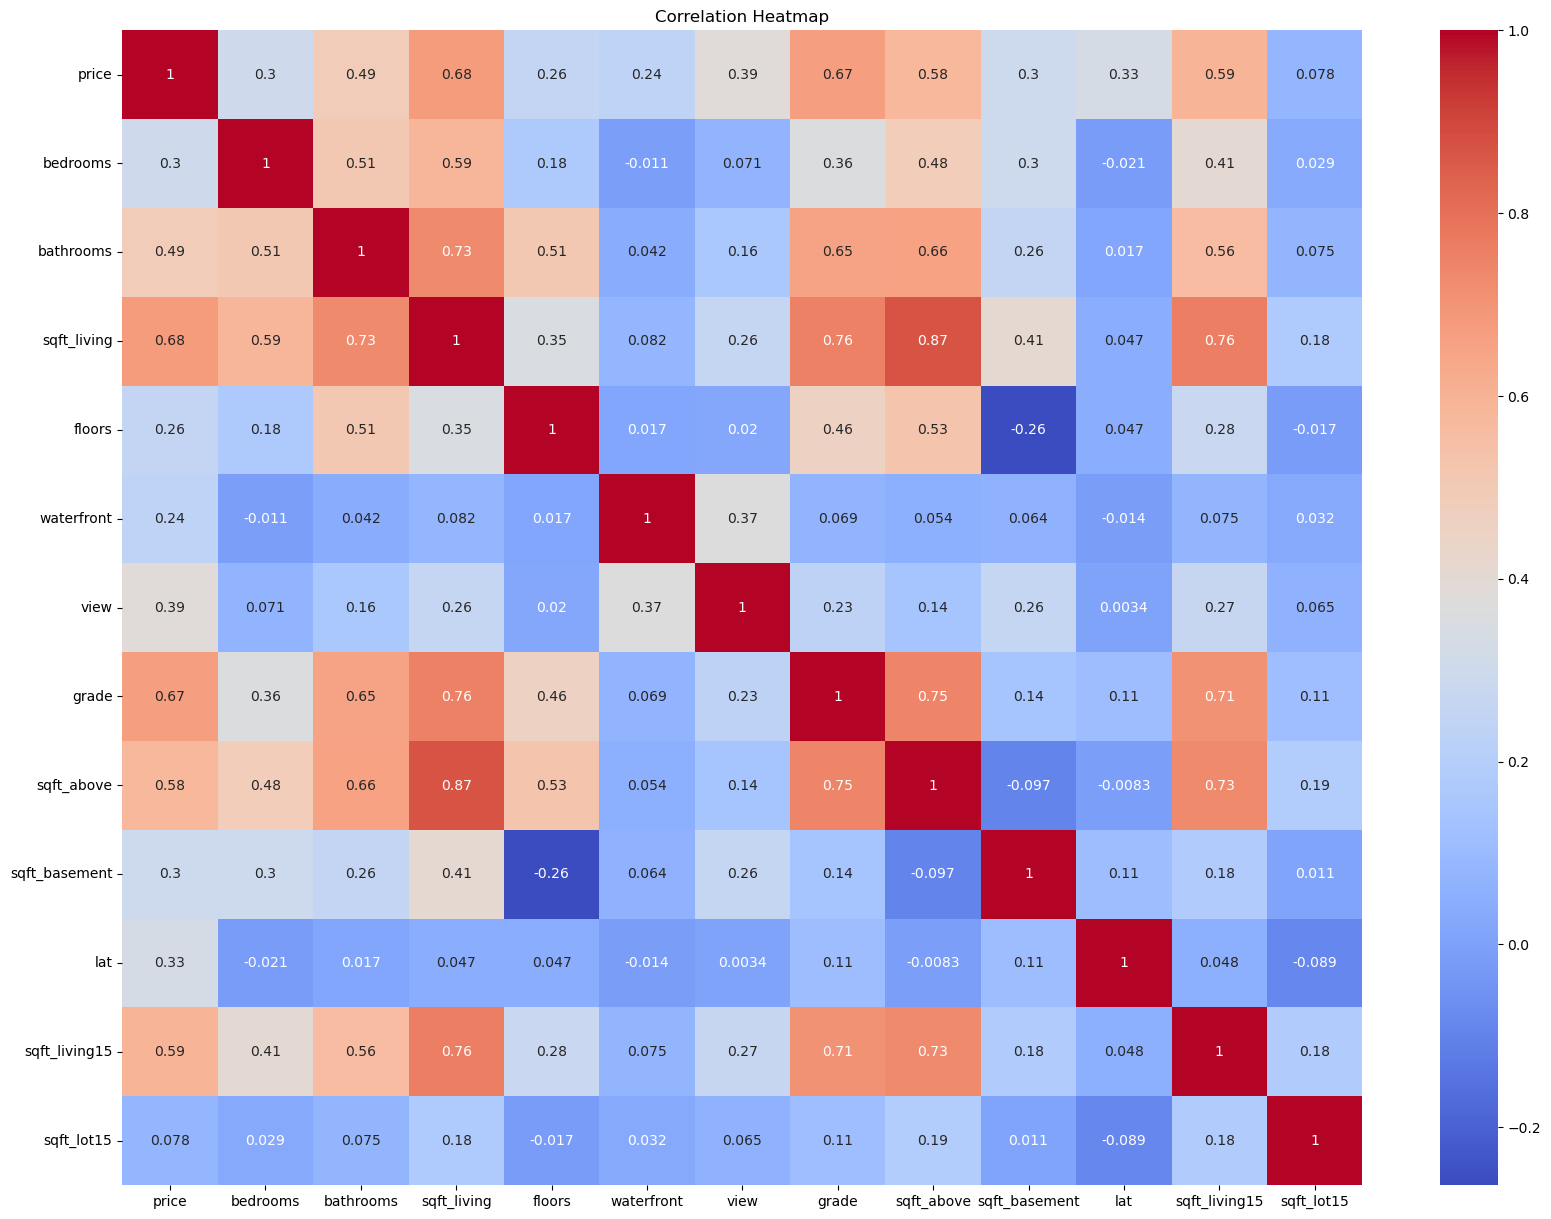

In [30]:
# Calculating the correlation matrix
corr_matrix = df_encoded.corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Top Multicollinear Features:
- bathrooms and sqft_living
- sqft_living and grade
- sqft_living and sqft_above
- sqft_living and sqft_living15
- grade and sqft_above
- grade and sqft_living15
- sqft_above and sqft_living15


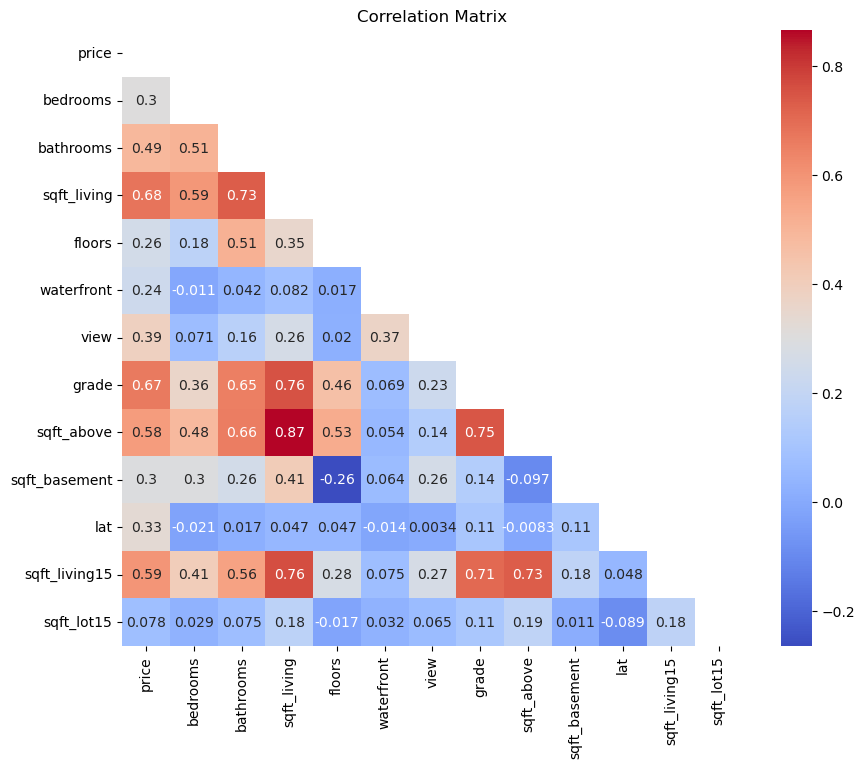

In [31]:
# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Finding the top multicollinear features
threshold = 0.7  # Setting the threshold for correlation coefficient
multicollinear_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feature_i = corr_matrix.columns[i]
            feature_j = corr_matrix.columns[j]
            multicollinear_features.append((feature_i, feature_j))

# Displaying the top multicollinear features
if len(multicollinear_features) > 0:
    print("Top Multicollinear Features:")
    for feature in multicollinear_features:
        print(f"- {feature[0]} and {feature[1]}")
else:
    print("No multicollinear features found.")

plt.show()

In [32]:
# To further show this I'll display the correlations in a tabular format
correlation_table = corr_matrix.unstack().sort_values(ascending=False).reset_index()
correlation_table.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlation_table = correlation_table[correlation_table['Feature 1'] != correlation_table['Feature 2']]

# Showing the first 10 multicollinear features
top_multicollinear_features = correlation_table.head(10)
print("Top 10 Multicollinear Features:")
print(top_multicollinear_features)


Top 10 Multicollinear Features:
        Feature 1      Feature 2  Correlation
13    sqft_living     sqft_above     0.867039
14     sqft_above    sqft_living     0.867039
15    sqft_living  sqft_living15     0.762060
16  sqft_living15    sqft_living     0.762060
17    sqft_living          grade     0.755701
18          grade    sqft_living     0.755701
19          grade     sqft_above     0.747022
20     sqft_above          grade     0.747022
21     sqft_above  sqft_living15     0.731974
22  sqft_living15     sqft_above     0.731974


The analysis indicates that the square footage of the house (sqft_living) has the highest correlation with sqft_above. Additionally, there are correlations between sqft_living,the grade of the house and  the square footage of land lots of the nearest 15 neighbors (sqft_living15). The findings suggest that the size of the house and the surrounding land lots may be related, potentially indicating a neighborhood-wide trend.

Identifying and understanding these multicollinear relationships helps in refining models and making more accurate predictions.

#### ii) Review of Correlations of Features with Price

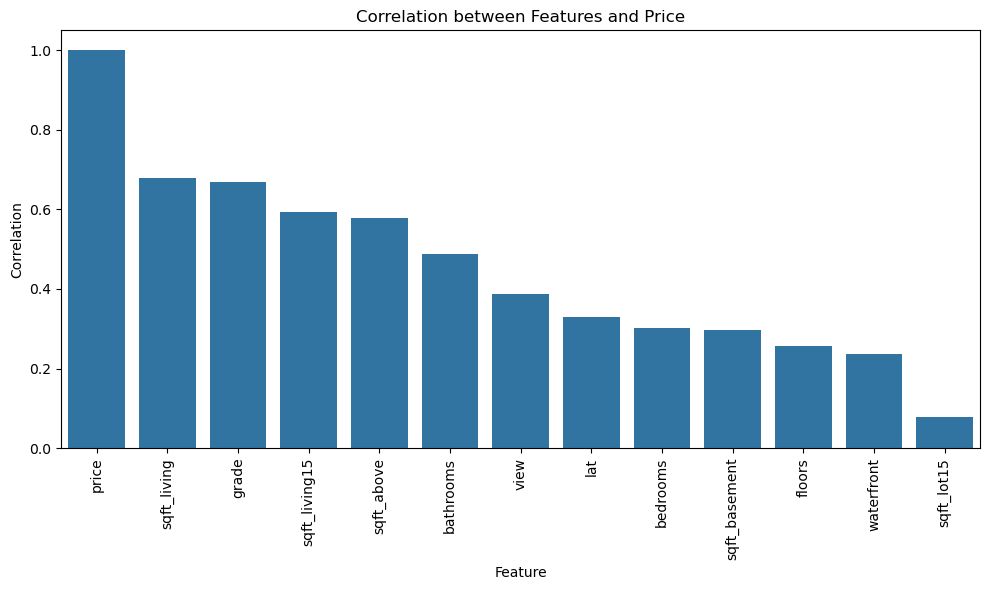

In [33]:
# Calculating the correlations between features and price
correlations = df_encoded.corr()['price'].sort_values(ascending=False)

# Setting the default Jupyter Notebook blue color
default_blue = '#1f77b4'

# Bar plot with the default blue color
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, color=default_blue)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlation between Features and Price')
plt.tight_layout()
plt.show()


In [34]:
#Displaing this in a tabular format

#Calculating the correlations between features and price
correlations = df_encoded.corr()['price'].sort_values(ascending=False)

#tabular format
correlation_table = pd.DataFrame({'Feature': correlations.index, 'Correlation': correlations.values})
print(correlation_table)

          Feature  Correlation
0           price     1.000000
1     sqft_living     0.678120
2           grade     0.668166
3   sqft_living15     0.594483
4      sqft_above     0.578316
5       bathrooms     0.488978
6            view     0.386944
7             lat     0.330520
8        bedrooms     0.302209
9   sqft_basement     0.297087
10         floors     0.256656
11     waterfront     0.236799
12     sqft_lot15     0.077846


**Analysis**

+ The analysis reveals that the price of a house exhibits the highest correlation with the square footage of the living area (sqft_living) at 0.68, indicating a strong positive relationship. 

+ The grade of the house follows closely with a correlation of 0.67, suggesting that higher-grade properties tend to have higher prices. Additionally, the square footage of the living area to the nearest 15 neighbors (sqft_living15) and the square footage of the house above ground (sqft_above) show moderate positive correlations of 0.59 and 0.58, respectively, indicating their influence on house prices.

+ Finally, the number of bathrooms demonstrates a relatively weaker positive correlation of 0.49, suggesting that houses with more bathrooms tend to have slightly higher prices. These findings highlight the importance of these features in determining house prices and can be valuable insights for buyers, sellers, and real estate professionals in making informed decisions and refining my model.

+ Although sqft_living and sqft_above are both highly correlated with price, only one of them can be included in a multiple regression model because they are also highly correlated with each other.

#### iii) Linear Relationships

Creating objects for the variables that have the strongest correlation with price and drawing the scatterplots.

<Figure size 640x480 with 0 Axes>

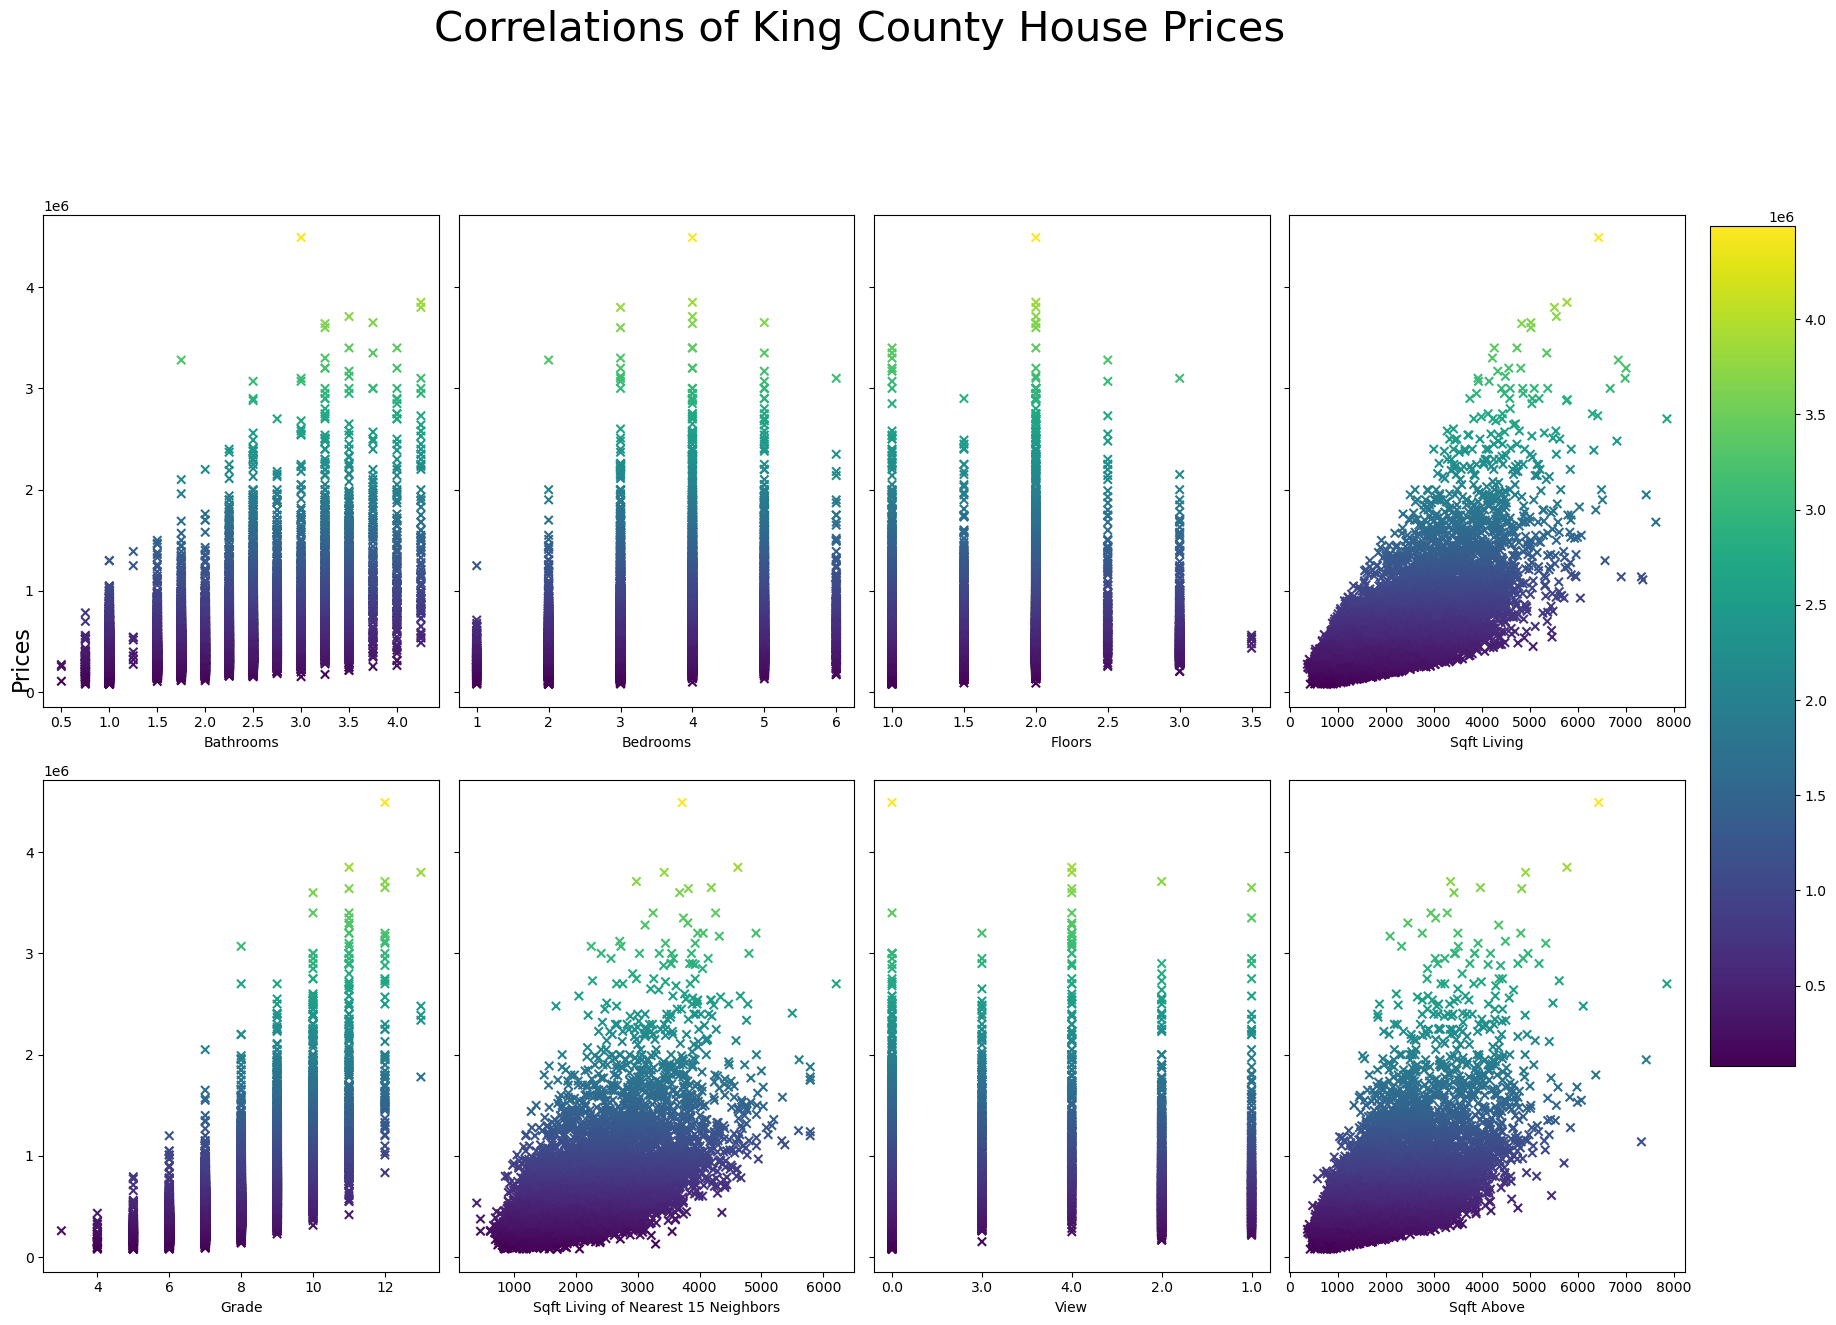

In [35]:
f = plt.figure()
f, axes = plt.subplots(nrows=2, ncols=4, sharex=False, sharey=True, figsize=(17, 12))

f.suptitle('Correlations of King County House Prices', fontsize=30, y=1.1)

f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16)

sc = axes[0][0].scatter(df_encoded['bathrooms'], df_encoded['price'], c=df_encoded['price'], marker="x")
axes[0][0].set_xlabel('Bathrooms')

axes[0][1].scatter(df_encoded['bedrooms'], df_encoded['price'], c=df_encoded['price'], marker="x")
axes[0][1].set_xlabel('Bedrooms')

axes[1][0].scatter(df_encoded['grade'], df_encoded['price'], c=df_encoded['price'], marker="x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(df_encoded['sqft_living15'], df_encoded['price'], c=df_encoded['price'], marker="x")
axes[1][1].set_xlabel('Sqft Living of Nearest 15 Neighbors')

axes[0][2].scatter(df_encoded['floors'], df_encoded['price'], c=df_encoded['price'], marker="x")
axes[0][2].set_xlabel('Floors')

axes[1][2].scatter(df_encoded['view'].astype(str), df_encoded['price'], c=df_encoded['price'], marker="x")
axes[1][2].set_xlabel('View')

sc = axes[0][3].scatter(df_encoded['sqft_living'], df_encoded['price'], c=df_encoded['price'], marker="x")
axes[0][3].set_xlabel('Sqft Living')

sc = axes[1][3].scatter(df_encoded['sqft_above'], df_encoded['price'], c=df_encoded['price'], marker="x")
axes[1][3].set_xlabel('Sqft Above')

cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])
f.colorbar(sc, cax=cbar_ax)

f.tight_layout()
plt.show()

**Analysis**

The ‘view’, ‘floors’, and ‘bedrooms’ variables do not have a clear linear relationship with house price. Sqft_living has a stronger linear relationship with price than sqft_above, so it will be used in the multiple regression model. Due to its multicollinearity with sqft_living, sqft above will be excluded.


**_Selected Feautures_**;Thus for Multiple Regression Model I preselected 4 feautures that had the highest correlation with price and did not violate the multocorrelianity assumption:

+ grade 
+ bathrooms 
+ sqft_living15  
+ sqft_living



### Modelling

In [36]:
# Creating a new DataFrame with the selected variables
selected_vars = ['bathrooms', 'grade', 'sqft_living', 'sqft_living15']
df_selected = df_encoded[selected_vars].copy()

# Updating the target variable 'price' and the sqft variables to their natural logarithm
df_selected['price'] = np.log(df_encoded['price'])
df_selected['sqft_living'] = np.log(df_encoded['sqft_living'])
df_selected['sqft_living15'] = np.log(df_encoded['sqft_living15'])

# Performing ordinal encoding on the 'grade' column
encoder = OrdinalEncoder()
df_selected['grade'] = encoder.fit_transform(df_selected[['grade']])

# Converting the data types of the columns to numeric
df_selected = df_selected.astype({'bathrooms': float, 'grade': float, 'sqft_living': float, 'sqft_living15': float})

# Adding a constant column to the DataFrame for the intercept term in the regression model
df_selected = sm.add_constant(df_selected)

# Fitting the multiple regression model
model = sm.OLS(df_selected['price'], df_selected.drop('price', axis=1))
results = model.fit()

# Print the summary of the regression model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     6000.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:34:39   Log-Likelihood:                -7786.2
No. Observations:               20913   AIC:                         1.558e+04
Df Residuals:                   20908   BIC:                         1.562e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.1050      0.079    102.451

### Normality

Assessing the normality of the residuals for the variables using diagnostic QQ plots.

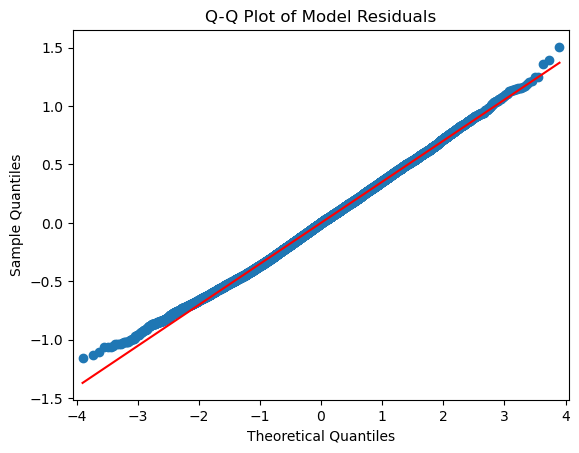

In [37]:
# Assuming you have the model results stored in the variable 'results'
residuals = results.resid

# Generate the Q-Q plot
sm.qqplot(residuals, line='s')

# Set plot title and labels
plt.title("Q-Q Plot of Model Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display the plot
plt.show()


Almost all of the data points fall along a straight line in this QQ-plot, thus we can consider the normality assumption satisfied.

### Homoscedasticity
checking for constant variance of error terms

To visualize this, I made a scatterplot with the model’s residuals on the y axis and fitted values on the x-axis. For the homoscedasticity assumption to be satisfied, the shape of the points should be roughly symmetrical across a line at y=0.

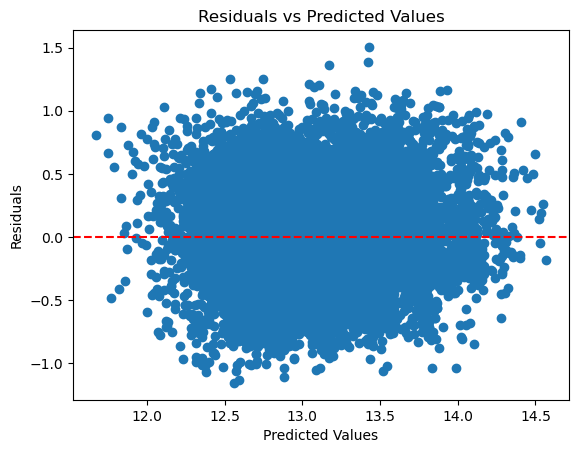

In [38]:
# Assuming we have the model results stored in the variable 'results'
residuals = results.resid
predicted = results.fittedvalues

# Creating a scatter plot of residuals vs predicted values
plt.scatter(predicted, residuals)

# Adding a horizontal line at y = 0
plt.axhline(y=0, color='red', linestyle='--')

# Setting plot title and labels
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


The model points have a roughly symmetrical blob-like shape that is consistent across the x-axis. Thus the model satisfies the assumption of homoscedasticity.

## c) Model Validation


I will employ cross-validation technique for model validation.This technique ensures the predictive model built is reliable for new data captured in the features.The process  will help ensure that the model's performance is not biased or overly optimistic and provides a realistic assessment of its capabilities for this data.



**Mean Squared Error(MSE)**

The code below creates train and test data for the x and y variables, use the x subsets to predict new y values, and then calculate the distance between these and the actual y-values. Finally, we use the mean_squared_error function to calculate the MSE for both subsets.

In [45]:
# Splitting the data into training and testing sets

X = df_selected.drop('price', axis=1)
y = df_selected['price']  
X_train, X_test, y_train, y_test = train_test_split(X, y)  # Splitting the data 75% of the data as the training subset and the other 25% as its test subset.

# Creating and fitting a Linear Regression model
linreg = LinearRegression()  
linreg.fit(X_train, y_train)  

# Making predictions on the training and testing data
y_hat_train = linreg.predict(X_train) 
y_hat_test = linreg.predict(X_test)  

# Calculating residuals (the differences between predicted and actual values)
train_residuals = y_hat_train - y_train  
test_residuals = y_hat_test - y_test  

# Calculating mean squared error (MSE)
train_mse = mean_squared_error(y_train, y_hat_train)  
test_mse = mean_squared_error(y_test, y_hat_test) 

# Printing the MSE values
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)



Train Mean Squared Error: 0.1222337541382977
Test Mean Squared Error: 0.1264896495280169


Comparing the MSE values, we can see that the model performs slightly better on the training data than on the testing data. The difference between the two MSE values is relatively small, indicating that the model's performance is consistent across both the training and testing sets.

The relatively low mean squared error (MSE) values of 0.1222 for the training dataset and 0.1265 for the testing dataset suggest that the model is performing reasonably well in capturing the patterns and relationships between the features and house prices. It indicates that, on average, the model's predictions are close to the actual house prices in both the training and testing datasets.


**Root Mean Squared Error(RMSE)**

To further measure of how well the model's predictions fit the actual data I shall use RMSE to measure the average magnitude of the residuals.

In [46]:
# Calculating root mean squared error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Printing the RMSE values
print('Train Root Mean Squared Error:', train_rmse)
print('Test Root Mean Squared Error:', test_rmse)



Train Root Mean Squared Error: 0.34961944187687516
Test Root Mean Squared Error: 0.35565383384411436


The low RMSE values of 0.3496 for the training dataset and 0.3557 for the testing data further demonstrate the success of this multiple linear regression model in predicting house prices in the King County housing market.

## d) Interpretation of Model Results

+ The model has an R-squared value of 0.534, indicating that approximately 53.4% of the variation in house prices can be explained by the included variables: bathrooms, grade, square footage of living space, and square footage of interior housing living space for the nearest 15 neighbors(sqft_living15).

+ The highly significant F-statistic of 6000 suggests that the overall model is statistically significant, meaning that the combined effects of the independent variables significantly contribute to predicting house prices.

+ The intercept coefficient (const) is estimated to be 8.1050, indicating that when all other variables are zero, the average price of a house is estimated to be $8.1050 million.

+ The coefficient for the number of bathrooms (bathrooms) is -0.0228, indicating that, on average, each additional bathroom is associated with a decrease of $22,800 in house price, holding other factors constant.

+ The coefficient for the grade of the house (grade) is 0.1879, suggesting that a higher grade is associated with a higher house price. Each unit increase in grade leads to an increase of $187,900 in price.

+ The coefficient for the square footage of living space (sqft_living) is 0.3621, indicating that an increase in the square footage of living space is associated with a higher house price. Each unit increase in square footage leads to an increase of $362,100 in price.

+ The coefficient for the square footage of interior housing living space for the nearest 15 neighbors (sqft_living15) is 0.1830, suggesting that more living space among the nearest 15 neighbors is associated with a higher house price. Each unit increase in sqft_living15 leads to an increase of $183,000 in price.

+ The standard errors associated with these coefficients provide a measure of the precision of the estimates. The low p-values indicate that all the coefficients are statistically significant, suggesting that they have a significant impact on house prices.

The analysis reveals that a higher grade, less bathrooms, and larger square footage of living space and interior living space among of the nearest 15 neighbors are associated with higher house prices. 

# 6 Conclusions

+ The multiple regression model demonstrates that approximately 53.4% of the variation in house prices can be explained by the included variables: the number of bathrooms, grade, square footage of living space, and square footage of interior housing living space for the nearest 15 neighbors.

+ The highly significant F-statistic of 6000 indicates that the overall model is statistically significant, signifying that the combined effects of the independent variables significantly contribute to predicting house prices.

+ The coefficients offer valuable insights into the relationship between the independent variables and house prices:

     + Each additional bathroom is associated with a decrease of $22,800 in house price, holding other factors constant

     + A higher grade is linked to a higher house price, with each unit increase in grade leading to an increase of $187,900 in price.

     + An increase in the square footage of living space is associated with a higher house price, with each unit increase resulting in an increase of $362,100 in price.

+ More square footage of interior housing living space among the nearest 15 neighbors (sqft_living15) is connected to a higher house price, with each unit increase leading to an increase of $183,000 in price.

+ The normality assumption of the model is satisfied based on the QQ-plot of the model residuals. Additionally, the scatter plot of residuals vs predicted values indicates that the residuals are centered around zero and exhibit random patterns, suggesting that the multiple linear regression assumptions are reasonably met.

+ The low MSE and RMSE values demonstrate the success of this model in predicting house prices in the King County housing market. These results provide confidence in the model's ability to estimate house prices accurately, which can be valuable for buyers, sellers, and real estate professionals in making informed decisions in the real estate market.The difference between the two MSE/RMSE values is relatively small, indicating that the model's performance is consistent across both the training and testing sets.


# 5 Recommendations

_To Consumers/Investors_

+ When evaluating house prices, consider the factors included in the multiple regression model: number of bathrooms, grade, square footage of living space, and square footage of the land lots of the nearest 15 neighbors (sqft_living15).

+ Pay attention to the quality and grade of a house, as higher grades are associated with higher prices. This information can be useful when comparing properties or making investment decisions.

+ Consider the impact of square footage of living space on house prices. A larger living space is associated with higher prices, so this factor should be taken into account when assessing property values.

+ While the model indicates that more bathrooms are associated with lower prices, it is important to consider other factors and individual preferences. Some buyers may value additional bathrooms, so it's essential to evaluate the overall appeal and functionality of a property.

_To Data Scientists_

+ The model assumes linearity and other assumptions of multiple regression. When making predictions or drawing conclusions, it is crucial to consider these assumptions and their potential limitations.

+ Regularly assess and validate the model's performance using metrics such as MSE. This will help gauge the accuracy and predictive power of the model and identify any potential areas for improvement.

+ There is still room for improvement. It is important to consider additional evaluation metrics and potentially explore other modeling approaches to further optimize the model's performance.

+ Other factors beyond those included in the model may also influence house prices. Consider incorporating additional variables or exploring alternative models to capture a more comprehensive understanding of house price dynamics in the real estate domain.